In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame
df = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

### Prepare the Data

In [5]:
# 4. Use StandardScaler to normalize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Check if the 'coin_id' column is present before scaling
if 'coin_id' in df.index:
    # Reset the index before scaling
    df_reset_index = df.reset_index(drop=True)
    scaled_data = scaler.fit_transform(df_reset_index.iloc[:, 1:])  # Exclude the first column ('coin_id') from scaling
else:
    scaled_data = scaler.fit_transform(df)

# 4.1 Create a DataFrame with the scaled data
columns_to_scale = df.columns[df.columns != 'coin_id']
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)

# Add the 'coin_id' column to the DataFrame
scaled_df['coin_id'] = df.index

# Set the 'coin_id' column as the index
scaled_df.set_index('coin_id', inplace=True)

# Display the first five rows of the scaled DataFrame
print(scaled_df.head())


              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

---

### Find the Best Value for k Using the Original Data.

c:\Users\Sebastian\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Sebastian\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Sebastian\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Sebastian\AppData\Local\Programs\Python\Python312\Lib\site-packa

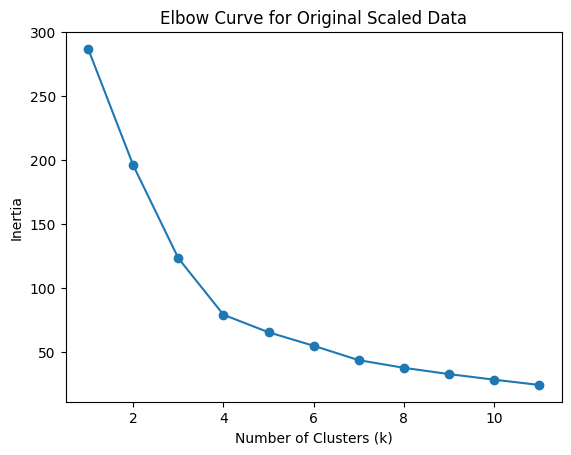

In [6]:
# 5. Use the elbow method to find the best value for k
from sklearn.cluster import KMeans

k_values = list(range(1, 12))
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia_values.append(kmeans.inertia_)

# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# 5.1 Plot the elbow curve
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Curve for Original Scaled Data')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** The best value for k is the point on the elbow curve where the inertia starts to decrease at a slower rate. 4 would be best for 'k'

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [7]:
# 6. Initialize the K-means model with the best value for k
best_k = 4
kmeans = KMeans(n_clusters=best_k, random_state=42)

# 6.1 Fit the K-means model using the original scaled DataFrame
kmeans.fit(scaled_df)

# 6.2 Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df.iloc[:, :-1])  # Exclude the 'cluster' column

# 6.3 Initialize the K-means model with the best value for k
best_k = 4
kmeans = KMeans(n_clusters=best_k, random_state=42)

# 6.4 Fit the K-means model using the PCA-transformed features
kmeans.fit(pca_result)

# 6.5 Predict the clusters to group the cryptocurrencies
scaled_df['cluster'] = kmeans.predict(pca_result)

# 6.6 Create a scatter plot using hvPlot
scaled_df['PC1'] = pca_result[:, 0]
scaled_df['PC2'] = pca_result[:, 1]
scaled_df.hvplot.scatter(x='PC1', y='PC2', by='cluster', hover_cols=['coin_id'])

c:\Users\Sebastian\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Sebastian\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


:NdOverlay   [cluster]
   :Scatter   [PC1]   (PC2,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [8]:
# 7. Using PCA to reduce features to three principal components
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_data = pca.fit_transform(scaled_df.drop(columns=['cluster']))

# 7.1 Retrieve explained variance
explained_variance = pca.explained_variance_ratio_.sum()
print(f'Total Explained Variance of the Three Principal Components: {explained_variance}')

# 7.2 Create a new DataFrame with the PCA data and include 'coin_id'
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'])
pca_df['coin_id'] = scaled_df.index  # Use the index as 'coin_id'
pca_df.set_index('coin_id', inplace=True)

# Display the first five rows of the PCA DataFrame
print(pca_df.head())

Total Explained Variance of the Three Principal Components: 0.9336550694231974
                   PC1       PC2       PC3
coin_id                                   
bitcoin       0.770088 -1.329151  0.369620
ethereum      0.331139 -1.070727  0.882051
tether       -0.424870 -0.217488 -0.695692
ripple       -0.521059 -0.280089 -0.536940
bitcoin-cash  1.990237 -3.145049  1.690635


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** Approximately 93.37%.

---

### Find the Best Value for k Using the PCA Data

c:\Users\Sebastian\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Sebastian\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Sebastian\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Sebastian\AppData\Local\Programs\Python\Python312\Lib\site-packa

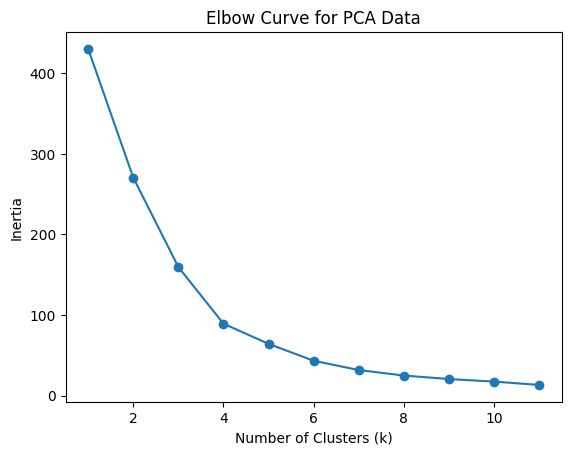

In [9]:
# 8. Use the elbow method on the PCA data to find the best value for k
k_values_pca = list(range(1, 12))
inertia_values_pca = []

for k in k_values_pca:
    kmeans_pca = KMeans(n_clusters=k, random_state=42)
    kmeans_pca.fit(pca_df)
    inertia_values_pca.append(kmeans_pca.inertia_)

# 8.1 Plot the elbow curve for PCA data
plt.plot(k_values_pca, inertia_values_pca, marker='o')
plt.title('Elbow Curve for PCA Data')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value for 'k' using this method is still 4.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** There is no difference in the 'k' value when using each of the methods.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [10]:
# 9. Initialize the K-means model with the best value for k using PCA data
best_k_pca = 4  # replace with the value you found from the elbow method using PCA data
kmeans_pca = KMeans(n_clusters=best_k_pca, random_state=42)

# 9.1 Fit the K-means model using the PCA data
kmeans_pca.fit(pca_df)

# 9.2 Predict the clusters to group the cryptocurrencies using the PCA data
pca_df['cluster'] = kmeans_pca.predict(pca_df)

# 9.3 Create a scatter plot using hvPlot
pca_df.hvplot.scatter(x='PC1', y='PC2', by='cluster', hover_cols=['coin_id'])

c:\Users\Sebastian\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


:NdOverlay   [cluster]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

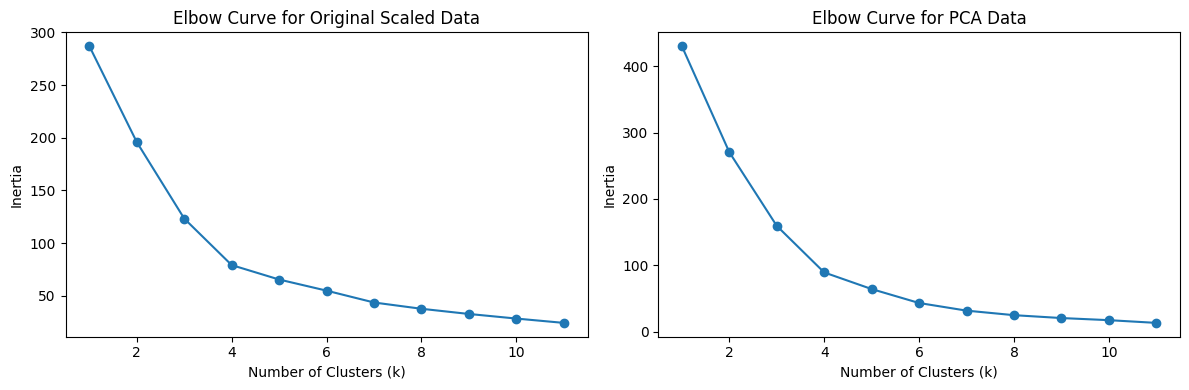

In [11]:
# 8.1 Plot the elbow curves for both original scaled data and PCA data in a composite plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Elbow curve for original scaled data
ax1.plot(k_values, inertia_values, marker='o')
ax1.set_title('Elbow Curve for Original Scaled Data')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia')

# Elbow curve for PCA data
ax2.plot(k_values_pca, inertia_values_pca, marker='o')
ax2.set_title('Elbow Curve for PCA Data')
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Inertia')

plt.tight_layout()
plt.show()

Index(['PC1', 'PC2', 'PC3', 'cluster'], dtype='object')


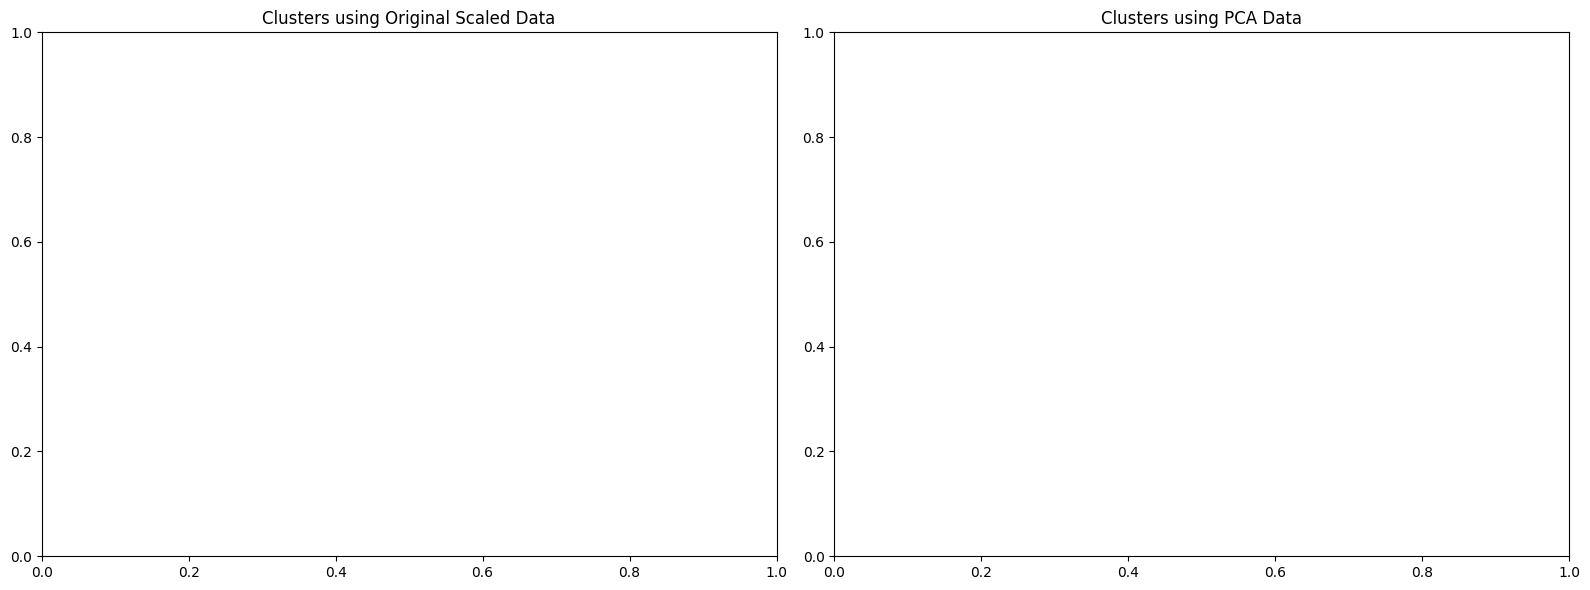

In [12]:
print(pca_df.columns)

# 9.5 Composite scatter plot to contrast the clusters using both original scaled data and PCA data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot for original scaled data
scaled_df.hvplot.scatter(x='PC1', y='PC2', by='cluster', hover_cols=['coin_id'], ax=ax1)
ax1.set_title('Clusters using Original Scaled Data')

# Scatter plot for PCA data
pca_df.hvplot.scatter(x='PC1', y='PC2', by='cluster', hover_cols=['coin_id'], ax=ax2)
ax2.set_title('Clusters using PCA Data')

plt.tight_layout()
plt.show()

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Using fewer features, especially with techniques like PCA, simplifies the analysis by reducing the number of variables. Here's the impact:

Simpler Understanding: Fewer features make it easier to understand and interpret clusters.

Easier Visualization: It's easier to visualize clusters in 2D or 3D space compared to many dimensions.

Faster Computation: Working with fewer features can speed up the clustering process.